In [29]:
#Importing the necessary libraries

import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [30]:
#Global Settings 
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [31]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
finbert_models = config.finbert_models
Body = config.Body
database = config.Local_Database

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [32]:
#Import Sentiment Data 
state = pd.read_csv(f"{finbert_models}/{Body}/Statements/{Body}_Statements_finbert_model_short.csv")
#state = state[['date','sentiment', 'positive', 'negative', 'neutral']]
state = state[['date','sentiment']]
state = state.groupby('date').mean().reset_index()

mins = pd.read_csv(f"{finbert_models}/{Body}/Minutes/{Body}_Minutes_finbert_model_short.csv")
mins = mins[['date','sentiment', 'positive', 'negative', 'neutral']]
mins = mins.groupby('date').mean().reset_index()
mins['mins'] = 1

state['date'] = pd.to_datetime(state['date'])
mins['date'] = pd.to_datetime(mins['date'])


In [33]:
fedfunds = pd.read_csv(f'{database}/Market Data/Fed Funds/Fed Funds.csv')
fedfunds = fedfunds[['date', 'fedfunds']]
fedfunds['date'] = pd.to_datetime(fedfunds['date'])

state = pd.merge(state, fedfunds, on='date', how='outer')

state['diff'] = state['fedfunds'].diff()

state['event'] = 0

In [34]:
#Event
state['event'] = np.where((state['sentiment'].notna() == True), 1, 0)

#High Rates 
# state['event'] = np.where((state['fedfunds'] > state['fedfunds'].mean()) & (state['sentiment'].notna() == True), 1, 0)

#Rate Hike
#state['event'] = np.where((state['diff'] >= 0.25) & (state['sentiment'].notna() == True), 1, 0)


#Positive Sentiment 
#state = state[(state['sentiment'] > state['sentiment'].mean())]

#Negative Sentiment
#state = state[(state['sentiment'] < state['sentiment'].mean())]

state = state[['date', 'sentiment', 'event']]

In [35]:
monthly = state.copy(deep = True)
monthly = monthly[['date', 'event']]
monthly['date'] = pd.to_datetime(monthly['date'])
monthly = monthly.set_index('date')
monthly = monthly.resample('M').sum().reset_index()







unemployment = pd.read_csv(f'{database}/Market Data/Unemployment/Unemployment.csv')
unemployment = unemployment[['date', 'unemployment']]
unemployment['date'] = pd.to_datetime(unemployment['date'])
unemployment = unemployment.set_index('date')
unemployment = unemployment.resample('M').mean().reset_index()

monthly = pd.merge(monthly, unemployment, on='date', how='outer')

monthly = monthly.sort_values(by='date')

  

In [36]:
#Create a dataframe with a column date that ranges from 1990-01-01 to 2024-01-01 with a daily frequency
#This is used to merge the dataframes
date_rng = pd.date_range(start='1/1/1990', end='1/1/2024', freq='D')
date_rng = pd.DataFrame(date_rng, columns=['date'])
date_rng['temp'] = 1
state = pd.merge(date_rng, state, on='date', how='outer')
state = state[['date', 'sentiment', 'event']]

In [37]:
#Importing Market Data
sp500 = pd.read_csv(f'{database}/Market Data/SP500/SP500.csv')
sp500 = sp500[['date', 'price', 'volume']]
sp500['volume'] = sp500['volume']/1000000
sp500 = sp500.rename(columns={'price':'sp500_price', 'volume':'sp500_volume'})

emini = pd.read_csv(f'{database}/Market Data/E Mini/E Mini SP500.csv')
emini = emini[['date', 'price']]
emini = emini.rename(columns={'price':'emini_price'})

eurodollar = pd.read_csv(f'{database}/Market Data/Eurodollar/Eurodollar.csv')
eurodollar = eurodollar[['date', 'price']]
eurodollar = eurodollar.rename(columns={'price':'eurodollar_price'})

fedfutures = pd.read_csv(f'{database}/Market Data/Fed Futures/FFF 30 Day.csv')
fedfutures = fedfutures[['date', 'price']]
fedfutures = fedfutures.rename(columns={'price':'fedfutures_price'})

vix = pd.read_csv(f'{database}/Market Data/VIX/VIX.csv')
vix = vix[['date', 'sentiment']]
vix = vix.rename(columns={'sentiment':'vix_sentiment'})

unemployment = pd.read_csv(f'{database}/Market Data/Unemployment/Unemployment.csv')
unemployment = unemployment[['date', 'unemployment']]

inflation = pd.read_csv(f'{database}/Market Data/Inflation/Inflation.csv')
inflation = inflation[['date', 'inflation']]

fedfunds = pd.read_csv(f'{database}/Market Data/Fed Funds/Fed Funds.csv')
fedfunds = fedfunds[['date', 'fedfunds']]



In [38]:
#conveting date to datetime

sp500['date'] = pd.to_datetime(sp500['date'])
emini['date'] = pd.to_datetime(emini['date'])
eurodollar['date'] = pd.to_datetime(eurodollar['date'])
fedfutures['date'] = pd.to_datetime(fedfutures['date'])
vix['date'] = pd.to_datetime(vix['date'])
unemployment['date'] = pd.to_datetime(unemployment['date'])
inflation['date'] = pd.to_datetime(inflation['date'])
fedfunds['date'] = pd.to_datetime(fedfunds['date'])

In [39]:
#Print the first and last dates of every dataframe
print(f"State: {state.date.min()} - {state.date.max()}")
print(f"Mins: {mins.date.min()} - {mins.date.max()}")
print(f"SP500: {sp500.date.min()} - {sp500.date.max()}")
print(f"E Mini: {emini.date.min()} - {emini.date.max()}")
print(f"Eurodollar: {eurodollar.date.min()} - {eurodollar.date.max()}")
print(f"Fed Futures: {fedfutures.date.min()} - {fedfutures.date.max()}")
print(f"VIX: {vix.date.min()} - {vix.date.max()}")
print(f"Unemployment: {unemployment.date.min()} - {unemployment.date.max()}")
print(f"Inflation: {inflation.date.min()} - {inflation.date.max()}")
print(f"Fed Funds: {fedfunds.date.min()} - {fedfunds.date.max()}")



State: 1990-01-01 00:00:00 - 2024-02-06 00:00:00
Mins: 1998-07-02 00:00:00 - 2023-05-24 00:00:00
SP500: 1990-01-02 00:00:00 - 2024-02-01 00:00:00
E Mini: 1997-09-09 00:00:00 - 2024-02-01 00:00:00
Eurodollar: 1990-02-02 00:00:00 - 2023-06-15 00:00:00
Fed Futures: 1990-12-14 00:00:00 - 2024-02-01 00:00:00
VIX: 1990-02-02 00:00:00 - 2024-02-01 00:00:00
Unemployment: 1990-01-01 00:00:00 - 2024-01-01 00:00:00
Inflation: 1990-01-01 00:00:00 - 2023-12-01 00:00:00
Fed Funds: 1990-01-01 00:00:00 - 2024-02-06 00:00:00


In [40]:
# #caculate rolling standard deviation of the market data
# sp500['sp500_std_30'] = sp500['sp500_volume'].rolling(window=30).std()
# sp500['sp500_std_mean'] = sp500['sp500_std_30'].rolling(window=360).mean()
# print(sp500.head(-10))


In [41]:
state = pd.merge(state, fedfunds, on='date', how='outer')

In [42]:
market = date_rng.copy(deep=True)
market = market[['date']]
market = pd.merge(market, sp500, on='date', how='outer')
market = pd.merge(market, emini, on='date', how='outer')
market = pd.merge(market, eurodollar, on='date', how='outer')
market = pd.merge(market, fedfutures, on='date', how='outer')
market = pd.merge(market, vix, on='date', how='outer')
market = pd.merge(market, unemployment, on='date', how='outer')
market = pd.merge(market, inflation, on='date', how='outer')

market = market.sort_values(by='date')

market['unemployment'] = market['unemployment'].fillna(method='ffill')
market['inflation'] = market['inflation'].fillna(method='ffill')

market = market.fillna(method='ffill')

state = pd.merge(state, market, on='date', how='outer')

state = state[state['date'] >= '2001-01-01']



In [43]:
#Replace NaN with 0
state['event'] = state['event'].fillna(0)
#Sort state by date assending
state = state.sort_values(by='date')

In [44]:
#create correlation matrix
#print(state.corr())

In [45]:
#print(state.describe())

In [46]:
#Create a column that is the number of days since the last event for up to 10 days after the event
state['days_since_event'] = state['event'].groupby((state['event'] != state['event'].shift()).cumsum()).cumcount()
state['days_since_event'] = state['days_since_event'] + 1
#If state state['days_since_event'] is greater than 10, set it to nan
state['days_since_event'] = np.where(state['days_since_event'] > 30, np.nan, state['days_since_event'])
#If event = 1 sent days_since_event to 0
state['days_since_event'] = np.where(state['event'] == 1, 0, state['days_since_event'])

#Now do the same thing but for 10 days leading up to the event 
state['days_until_event'] = state['event'][::-1].groupby((state['event'][::-1] != state['event'][::-1].shift()).cumsum()).cumcount()[::-1]
state['days_until_event'] = state['days_until_event'] + 1
#If state state['days_until_event'] is greater than 10, set it to nan
state['days_until_event'] = np.where(state['days_until_event'] > 10, np.nan, state['days_until_event'])
#If event = 1 sent days_until_event to 0
state['days_until_event'] = np.where(state['event'] == 1, 0, state['days_until_event'])
state['days_until_event'] = state['days_until_event'] * -1

#create column event_count that is the combonation of days_since_event and days_until_event where it is na if both are na
state['event_count'] = state['days_since_event'].fillna(state['days_until_event'])



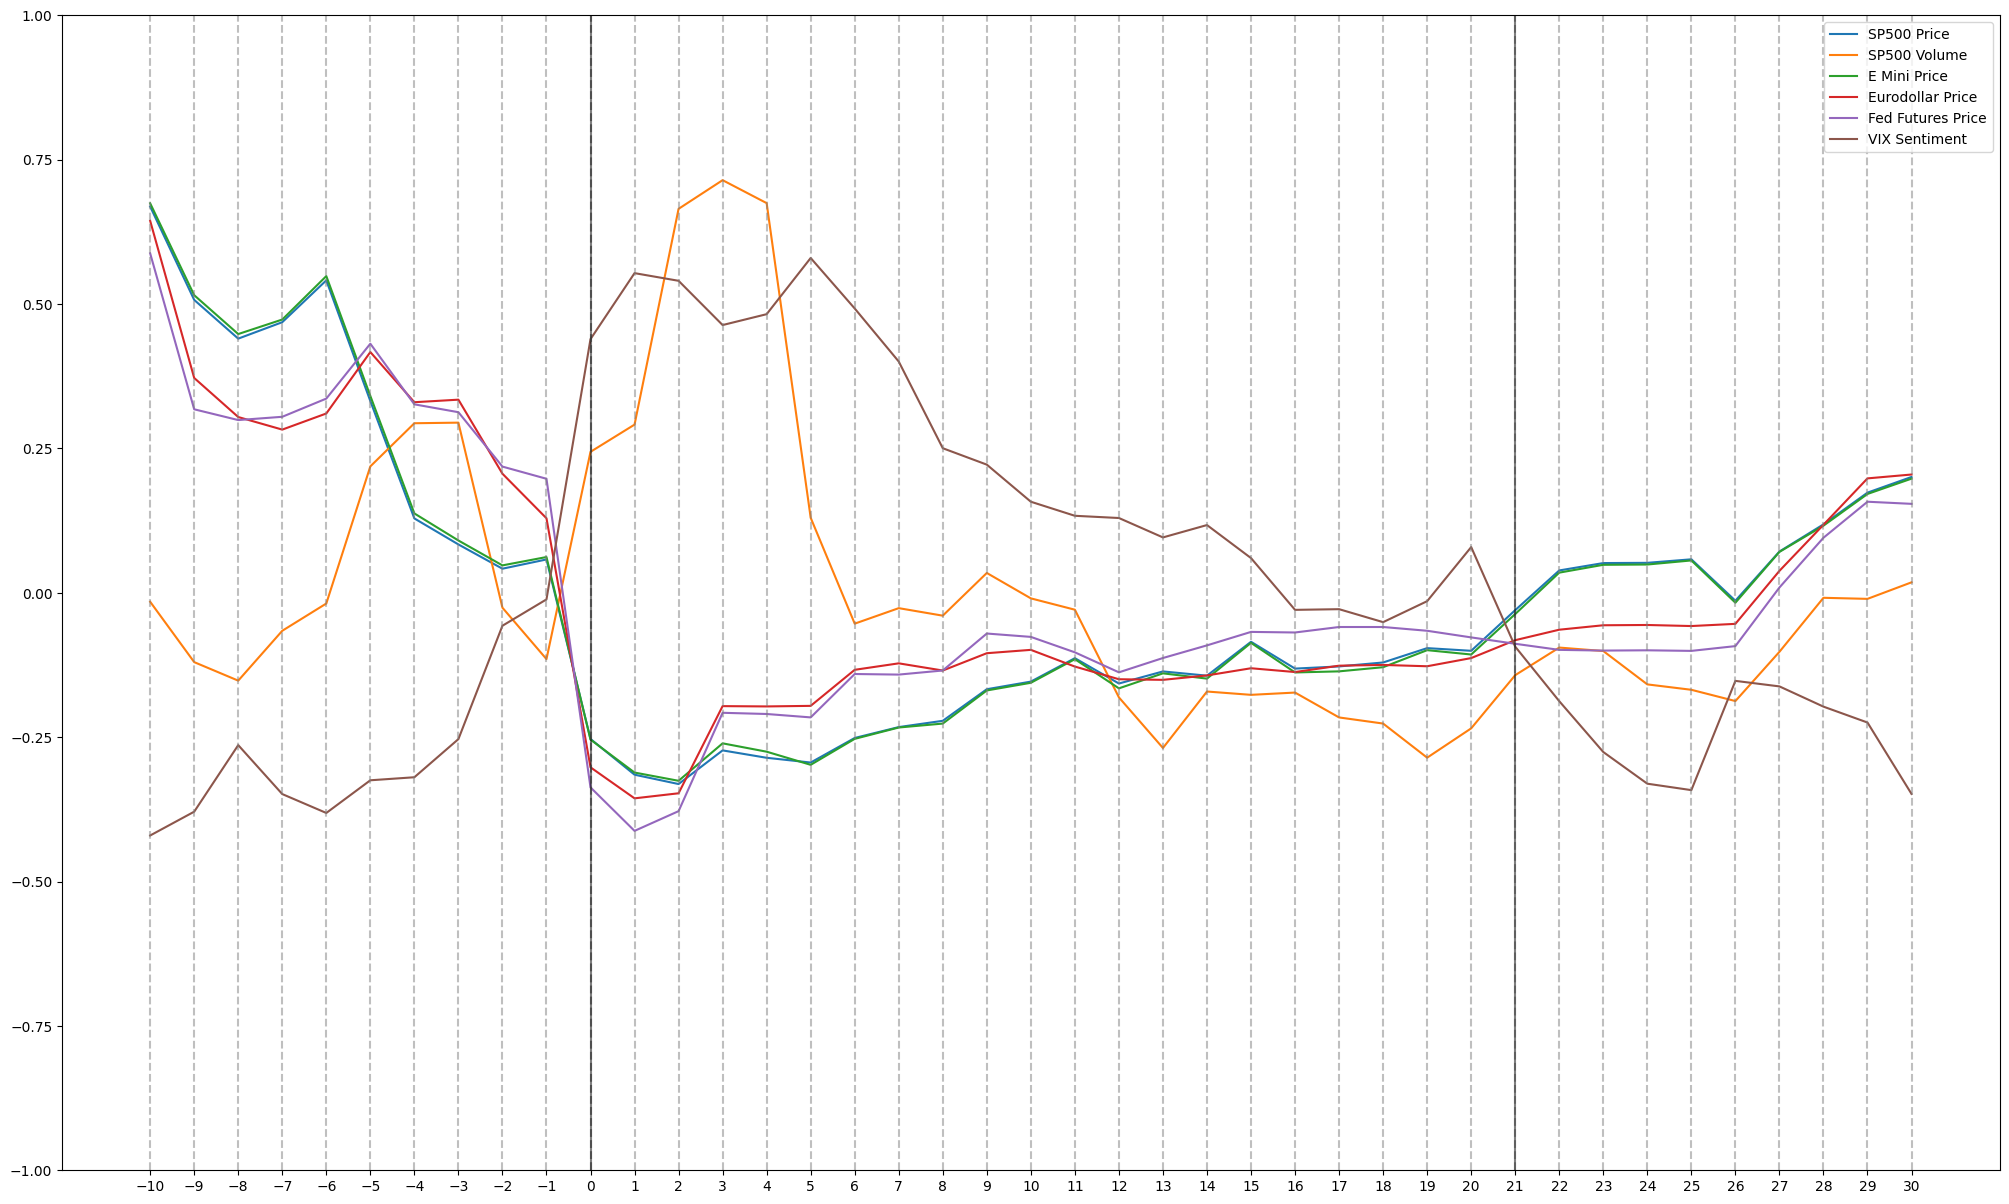

In [47]:
state = state[['date', 'sp500_price', 'sp500_volume', 'emini_price', 'eurodollar_price', 'fedfutures_price', 'vix_sentiment', 'event_count', 'unemployment', 'inflation', 'fedfunds']]
state = state.dropna()

state = state.groupby('event_count').mean().reset_index()

#create a graph of the mean of the market varaibles over the 10 days leading up to and after the event with all the variables scaled between -1 and 1
state['sp500_price'] = (state['sp500_price'] - state['sp500_price'].mean()) / (state['sp500_price'].max() - state['sp500_price'].min())
#state['sp500_std_30'] = (state['sp500_std_30'] - state['sp500_std_30'].mean()) / (state['sp500_std_30'].max() - state['sp500_std_30'].min())
#state['sp500_std_mean'] = (state['sp500_std_mean'] - state['sp500_std_mean'].mean()) / (state['sp500_std_mean'].max() - state['sp500_std_mean'].min())
state['sp500_volume'] = (state['sp500_volume'] - state['sp500_volume'].mean()) / (state['sp500_volume'].max() - state['sp500_volume'].min())
state['emini_price'] = (state['emini_price'] - state['emini_price'].mean()) / (state['emini_price'].max() - state['emini_price'].min())
state['eurodollar_price'] = (state['eurodollar_price'] - state['eurodollar_price'].mean()) / (state['eurodollar_price'].max() - state['eurodollar_price'].min())
state['fedfutures_price'] = (state['fedfutures_price'] - state['fedfutures_price'].mean()) / (state['fedfutures_price'].max() - state['fedfutures_price'].min())
state['vix_sentiment'] = (state['vix_sentiment'] - state['vix_sentiment'].mean()) / (state['vix_sentiment'].max() - state['vix_sentiment'].min())
state['unemployment'] = (state['unemployment'] - state['unemployment'].mean()) / (state['unemployment'].max() - state['unemployment'].min())
state['inflation'] = (state['inflation'] - state['inflation'].mean()) / (state['inflation'].max() - state['inflation'].min())
state['fedfunds'] = (state['fedfunds'] - state['fedfunds'].mean()) / (state['fedfunds'].max() - state['fedfunds'].min())



#Plot the data
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(state['event_count'], state['sp500_price'], label='SP500 Price')
ax.plot(state['event_count'], state['sp500_volume'], label='SP500 Volume')
ax.plot(state['event_count'], state['emini_price'], label='E Mini Price')
ax.plot(state['event_count'], state['eurodollar_price'], label='Eurodollar Price')
ax.plot(state['event_count'], state['fedfutures_price'], label='Fed Futures Price')
ax.plot(state['event_count'], state['vix_sentiment'], label='VIX Sentiment')
#ax.plot(state['event_count'], state['unemployment'], label='Unemployment')
#ax.plot(state['event_count'], state['inflation'], label='Inflation')
#ax.plot(state['event_count'], state['fedfunds'], label='Fed Funds')
ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

ax.set_xticks(state['event_count'])

#Set Y axis sale to -1 to 1
ax.set_ylim(-1, 1)

# #Add a vertical line at all days +-10 Days from the event
# for i in range(0, 11):
#     ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
#     ax.axvline(x=i * -1, color='gray', linestyle='--', alpha=0.5)

#Add a vertical line at all days 25 Days from the event
for i in range(0, 31):
    ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
for i in range(0, 11):
    ax.axvline(x=i * -1, color='gray', linestyle='--', alpha=0.5)
    
    
#Create a Black Vertical line at 21 days from the event
ax.axvline(x=21, color='black', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.5)

ax.legend()
plt.show()

